# Image Mask Example

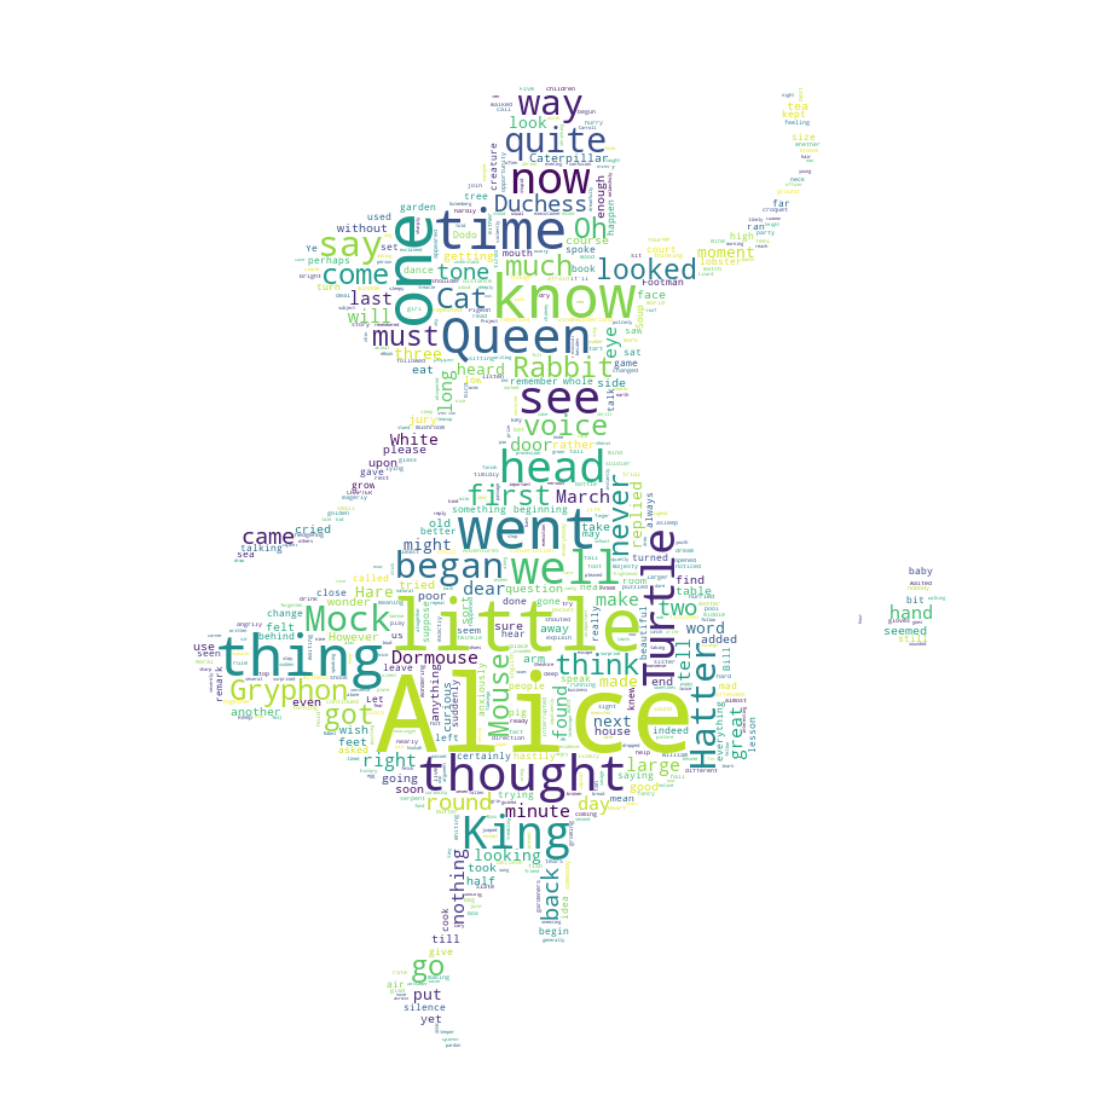

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullLocator
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("said")

# Read the whole text.
#text = strWords
text = open('alice.txt').read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open('alice_mask.png'))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, 
               collocations=False, stopwords=stopwords)

# generate word cloud
wc.generate(text)

# show
plt.imshow(wc, interpolation='bilinear')
plt.gca().xaxis.set_major_locator(NullLocator())   # remove white space around border
plt.gca().yaxis.set_major_locator(NullLocator())   # remove white space around border
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.gca().set_axis_off()
# fig.savefig(r'D:\temp\WordCloud.png', facecolor='black', format='png', bbox_inches='tight', pad_inches=0)
plt.show()

## Let's get word frequencies

wordcloud.process_text(str) returns a dict with words as keys and their respective frequencies as values.  To sort the dict by values in descending order, use sorted() method which will return a list with key-value pairs saved as tuples:

In [79]:
import operator
word_freq = wc.process_text(text)
top10 = sorted(A.items(), key=operator.itemgetter(1), reverse=True)[:10]

In [80]:
top10

[('Alice', 403),
 ('little', 128),
 ('one', 105),
 ('know', 90),
 ('went', 83),
 ('thing', 80),
 ('time', 77),
 ('thought', 76),
 ('Queen', 76),
 ('see', 67)]

## Let's make a pareto chart of top 20 words

To leverage pandas library for its charting capability, decided to store the words and their respective frequencies into lists.  The 2 lists are then used to create a pandas dataframe:

In [81]:
words = [word for word in wc.process_text(text).keys()]
counts =[count for count in wc.process_text(text).values()]

word_freq = pd.DataFrame(data={'word':words, 'qty':counts})

In [82]:
word_freq.head()

,qty,word
0,5,Project
1,6,Gutenberg
2,403,Alice
3,12,Adventures
4,8,Wonderland


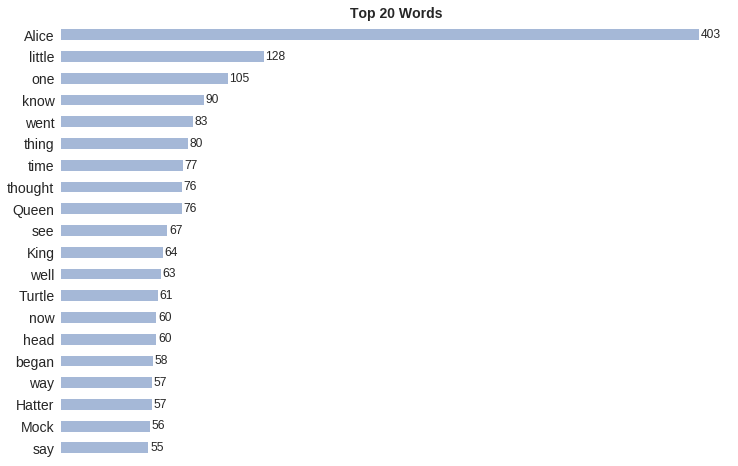

In [50]:
import seaborn as sns
sns.set_style('whitegrid')

fig, axis = plt.subplots(figsize=(12, 8))

top_x = 20
word_freq.sort_values(by='qty', ascending=False)[:top_x].set_index('word').sort_values(by='qty').plot.barh(alpha=0.5, ax=axis)
axis.set_title("Top " +str(top_x) + " Words", fontsize=14, weight='bold')
axis.yaxis.set_tick_params(labelsize=14)
axis.set_xticks([])
axis.set_xlabel('')
axis.set_ylabel('')
axis.legend().set_visible(False)
axis.grid(False)
sns.despine(top=True, right=True, bottom=True, left=True)

# Logic needed to add qty labels to the right of each bar
x=[]
y=[]
for value in word_freq.sort_values(by='qty', ascending=False)[:top_x].sort_values(by='qty').values:
    x.append(value[1])
    y.append(value[0])

for p, value in zip(range(len(y)), y):
    axis.text(x=(value + 1), y=p, s=str(value), va='center')
##########################################################

plt.show()

# Simple Example

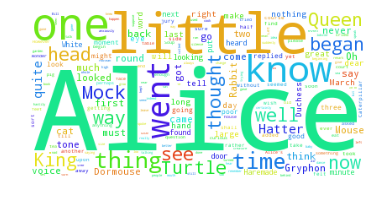

In [2]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()
wordcloud = WordCloud(background_color='white').generate(text)

wordcloud.to_file('/home/pybokeh/Downloads/simple.png')

# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
wordcloud.font_path

'/usr/share/fonts/truetype/droid/DroidSansMono.ttf'

### How to render an image inline using PIL/PIllow

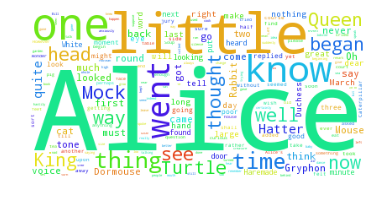

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


pil_im = Image.open('/home/pybokeh/Downloads/simple.png', 'r')
plt.axis("off")
plt.imshow(np.asarray(pil_im))
fig = plt.gcf()
#fig.set_size_inches(10,10)
plt.show()